In [46]:
#LR1
#Интенсивность		0.5
#Трудоемкость		11
#Быстродействие		5
#Время реакции		3

lambdai = 0.5
tetta = 11
B = 5
Uinput = 3
Ninput = 2

In [47]:
#Рассчитаем R загрузку
import math

R = lambdai*tetta/B

print("R =", R)

#Найдем P0
N = range(2, 10)

def findP0(n):
    rangeN = range(0, n)
    formulaResult = 0
    for i in rangeN:
        formulaResult += pow(R, i)/math.factorial(i)
    formulaResult = formulaResult + (pow(R, n+1))/( math.factorial(n) * (n-R) )
    return 1/formulaResult

print()
    
P0 = []
for index, n in enumerate(N):
    P0.insert(index, findP0(n))
print("P0 = ", P0)

print()

#Найдем u время реакции

U = []
for index, n in enumerate(N):
    middleResult = tetta/B * (1 + (pow(R, n))/(math.factorial(n-1) * pow(n-R, 2))*P0[index])
    U.insert(index, middleResult)
print("U =",U)
    


R = 1.1

P0 =  [0.35218156916454696, 0.3529291572113643, 0.3389861712637039, 0.334266730084303, 0.33313225757633513, 0.33291264212705574, 0.3328768433667142, 0.33287179134402844]

U = [3.3574164655753393, 2.34313672550503, 2.221638550086481, 2.2032444329531824, 2.2004506320469948, 2.200056946264992, 2.200006542127873, 2.200000686213305]


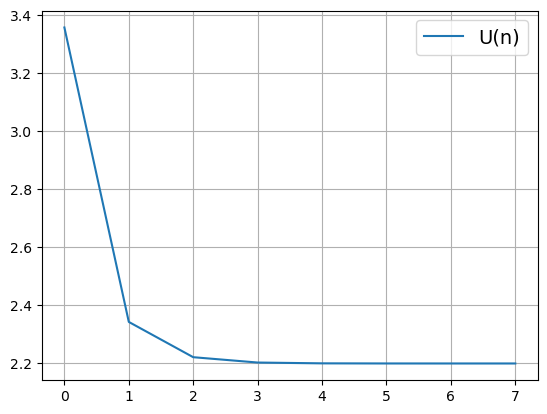

In [48]:
# График зависимости U от N
import numpy as np
import matplotlib.pyplot as plt

plt.plot(U, label='U(n)')
plt.grid(True)

plt.legend(loc='best', fontsize=14)
plt.show()

In [49]:
#Укажем еще на одну полезную характеристику ядра – среднее число l
#заданий, находящихся в очереди на обработку. В рассматриваемой модели l
#вычисляется по формуле


L = []
for index, n in enumerate(N):
    middleResult = (pow(R, n+1))/(math.factorial(n-1) * pow(n-R, 2))*P0[index]
    L.insert(index, middleResult)
print("L =",L)

#Для данного N=2 вычислим загрузку R, вероятность простоя p0 и среднее число
#заданий l в очереди.

print("Для заданного N =", N[0])
print("Вероятност простоя P0 = ", P0[0])
print("U = ", U[0])
print("Среднее число заданий L = ", L[0])

L = [0.5787082327876695, 0.07156836275251505, 0.010819275043240347, 0.0016222164765912728, 0.00022531602349736536, 2.8473132495894054e-05, 3.271063936330873e-06, 3.431066525394008e-07]
Для заданного N = 2
Вероятност простоя P0 =  0.35218156916454696
U =  3.3574164655753393
Среднее число заданий L =  0.5787082327876695


In [50]:
#Построим графики зависимости
#средней длины очереди от интенсивности λ
#потока заданий при фиксированном быстродействии B процессора
import numpy as np

N = 2
B1 = B
B2 = B + 2
B3 = B + 4
B4 = B + 6
B5 = B + 8

def findL(lam, bar):
    nRange = range(0, N)
    firstPart = (pow(tetta/bar, N+1) * pow(lam, N+1)) / (math.factorial(N-1) * pow(N - (tetta/bar) *lam, 2))
    secondPart = 0
    for i in nRange:
        secondPart += 1/math.factorial(i) * pow(tetta/bar, i) * pow(lam, i)
    thirdPart = (pow(tetta/bar, N+1) * pow(lam, N+1))/(math.factorial(N) * (N- (lam*tetta)/bar))
    return firstPart * 1/(secondPart + thirdPart)

def findNbDivTetta(bar):
    return (N*bar)/tetta

print( findNbDivTetta(B1))
lam1 = np.arange(0, findNbDivTetta(B1), 0.1)
print(lam1)


0.9090909090909091
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [34]:
lambda1 = []
for index, l1 in enumerate(lam1):
    lambda1.insert(index, findL(l1, B1))

lambda2 = []
lam2 = np.arange(0, findNbDivTetta(B2), 0.1)
for index, l2 in enumerate(lam2):
    lambda2.insert(index, findL(l2, B2))
    
lambda3 = []
lam3 = np.arange(0, findNbDivTetta(B3), 0.1)
for index, l3 in enumerate(lam3):
    lambda3.insert(index, findL(l3, B3))
    
lambda4 = []
lam4 = np.arange(0, findNbDivTetta(B4), 0.1)
for index, l4 in enumerate(lam4):
    lambda4.insert(index, findL(l4, B4))

lambda5 = []
lam5 = np.arange(0, findNbDivTetta(B5), 0.1)
for index, l5 in enumerate(lam5):
    lambda5.insert(index, findL(l5, B5))
    
print(lambda1)
print(lambda2)
print(lambda3)
print(lambda4)
print(lambda5)

[0.0, 0.0027479243519342505, 0.023855534752907935, 0.09059790761867227, 0.2487218202475634, 0.5787082327876695, 1.2400372939395985, 2.651400735682936, 6.704192008865056, 98.48761519246577]
[0.0, 0.0009865489707497233, 0.008254373989853599, 0.02978089732878225, 0.07680905649426882, 0.1656893125325105, 0.32061624430657304, 0.5787082327876695, 1.0016488987855665, 1.707527368678155, 2.9762018846829577, 5.726218247867101, 15.932749797324687]
[0.0, 0.00046120623827195997, 0.0037956527529382418, 0.013373123371165807, 0.033499746074217934, 0.06987131347745254, 0.13012067038377947, 0.2245677205544538, 0.36739017340929686, 0.5787082327876695, 0.8887487480060842, 1.347021225771271, 2.044756247439577, 3.178264792076451, 5.274078887123371, 10.405211726384389, 43.47280738065145]
[0.0, 0.0002517655056080767, 0.0020538098172109267, 0.007142951626344268, 0.017605633802816902, 0.036036036036036036, 0.06570941834996354, 0.11078990293770899, 0.1766004415011038, 0.2700050000925943, 0.4, 0.5787082327876695,

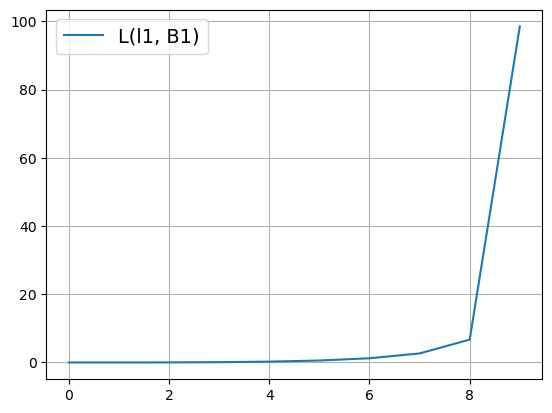

In [51]:
plt.plot(lambda1, label='L(l1, B1)')
plt.grid(True)
plt.legend(loc='best', fontsize=14)
plt.show()

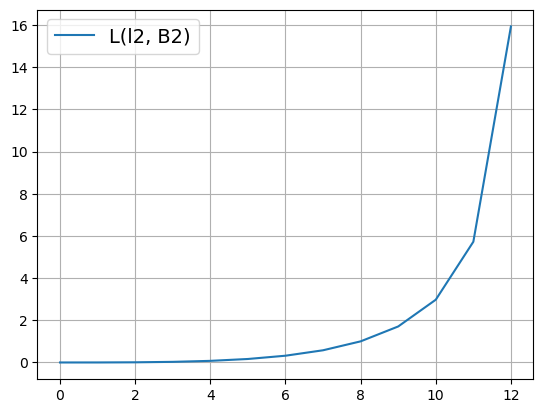

In [40]:
plt.plot(lambda2, label='L(l2, B2)')
plt.grid(True)
plt.legend(loc='best', fontsize=14)
plt.show()


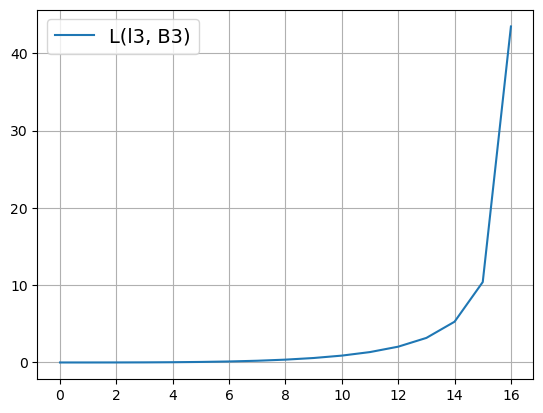

In [41]:
plt.plot(lambda3, label='L(l3, B3)')
plt.grid(True)
plt.legend(loc='best', fontsize=14)
plt.show()


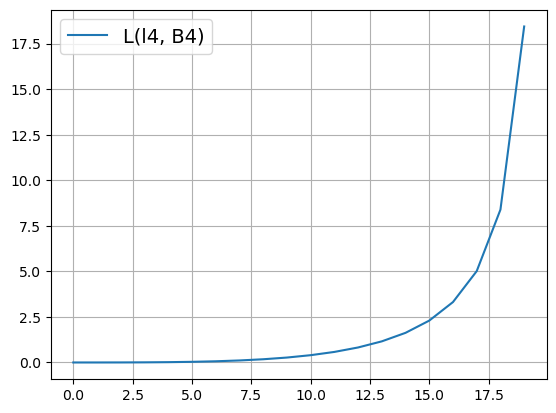

In [42]:
plt.plot(lambda4, label='L(l4, B4)')
plt.grid(True)
plt.legend(loc='best', fontsize=14)
plt.show()


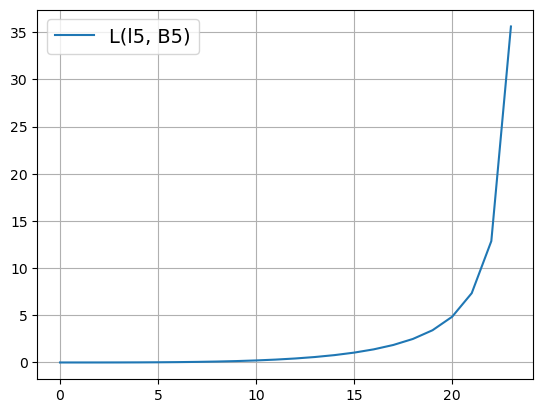

In [43]:
plt.plot(lambda5, label='L(l5, B5)')
plt.grid(True)
plt.legend(loc='best', fontsize=14)
plt.show()
